In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [ ]:
# Number of observations in each class
N1 = 80
N2 = 80
# Distance between class centers
d = 1.0
# Dispersion (standard deviation)
sigma1 = 0.5
sigma2 = 0.5

In [ ]:
# Class center 1 coordinates
x1_center = d / 2 * np.array([-1, 1])
# Class center 2 coordinates
x2_center = d / 2 * np.array([1, 1])


In [ ]:
# Combine class center locations
X_T = np.vstack((x1_center, x2_center))
# Add noise (random variations) to each feature
noise1 = np.random.normal(scale=sigma1, size=(N1, 2))
noise2 = np.random.normal(scale=sigma2, size=(N2, 2))
# Add noise to class centres to create data points
X1 = X_T[0, :] + noise1
X2 = X_T[1, :] + noise2
# Combine data points from both classes
X = np.concatenate((X1, X2), axis=0)


In [ ]:
# Create class labels (0 for class 1, 1 for class 2)
y = np.array([0] * N1 + [1] * N2)

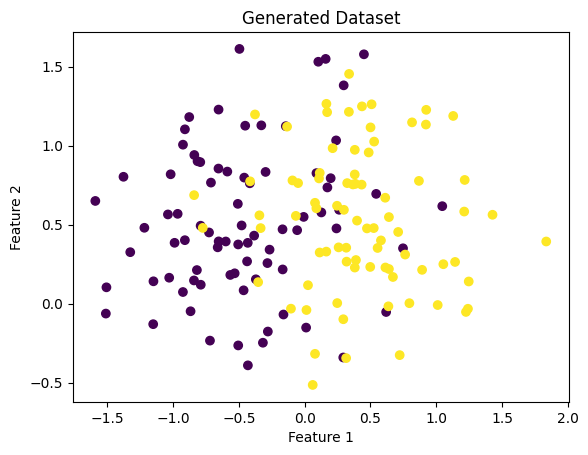

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Generated Dataset")
plt.show()

In [ ]:
# Define the number of clusters (should be 2 for this dataset)
n_clusters = 2
# Create a KMeans object with the specified number of clusters
kmeans = KMeans(n_clusters=n_clusters)
# Fit the KMeans model to the data
kmeans.fit(X)
# Get the cluster labels assigned by KMeans
kmeans_labels = kmeans.labels_


In [ ]:
# Align KMeans labels with true class labels
aligned_labels = np.zeros_like(kmeans_labels)
for cluster in range(n_clusters):
    mask = (kmeans_labels == cluster) # Indented this line by 4 spaces
    aligned_labels[mask] = np.argmax(np.bincount(y[mask])) # Indented this line by 4 spaces
# Calculate accuracy
accuracy = np.sum(aligned_labels == y) / len(y)
print("Accuracy:", accuracy)

Accuracy: 0.8425
